In [175]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [176]:
#Reading csv
dataset = pd.read_csv("windstorm.csv")

In [177]:
dataset.head()

,country,temperature,pressure,WindSpeed3pm,WindSpeed5pm,windgustspeed,Windstorm,hours
0,GB,40.98,1005.21,20.0,6.0,30,no,5
1,GB,40.98,1005.21,17.0,4.0,39,yes,5
2,GB,40.98,1005.21,6.0,6.0,85,yes,1
3,GB,42.75,1023.25,24.0,30.0,54,yes,3
4,GB,42.75,1023.25,28.0,20.0,50,yes,3


In [178]:
dataset.apply(lambda x : sum(x.isnull()),axis = 0)

country          0
temperature      0
pressure         0
WindSpeed3pm     0
WindSpeed5pm     0
windgustspeed    0
Windstorm        0
hours            0
dtype: int64

In [179]:
dataset.describe()

,temperature,pressure,WindSpeed3pm,WindSpeed5pm,windgustspeed,hours
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,57.214987,1004.257393,17.985815,9.572639,40.110276,4.145363
std,7.922587,11.790178,8.481866,7.571792,13.208147,1.097701
min,38.800000,943.240000,0.000000,0.000000,13.000000,0.000000
25%,49.940000,999.290000,11.000000,6.000000,31.000000,4.000000
50%,58.850000,1003.700000,17.980000,7.000000,39.000000,4.000000
75%,63.280000,1015.760000,24.000000,11.000000,46.000000,5.000000
max,71.790000,1034.210000,52.000000,41.000000,98.000000,6.000000


In [182]:
x = dataset[['temperature','pressure','WindSpeed3pm','WindSpeed5pm']].values
y = dataset[['hours','windgustspeed']]

In [183]:
#import statsmodels.api as sm
#model1 = sm.OLS(y, x).fit()
#predictions = model1.predict(x)
#model1.summary()

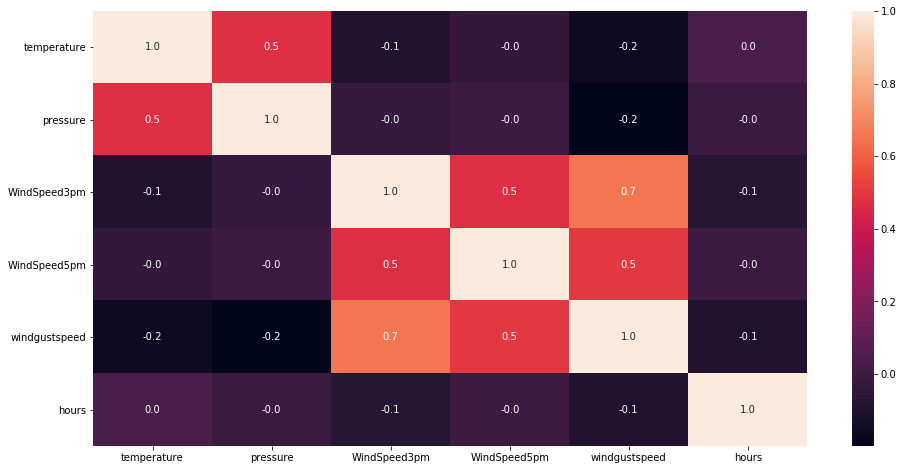

In [184]:
plt.figure(figsize = (16, 8))
sns.heatmap(dataset.corr(), annot=True, fmt=".1f")
plt.show()

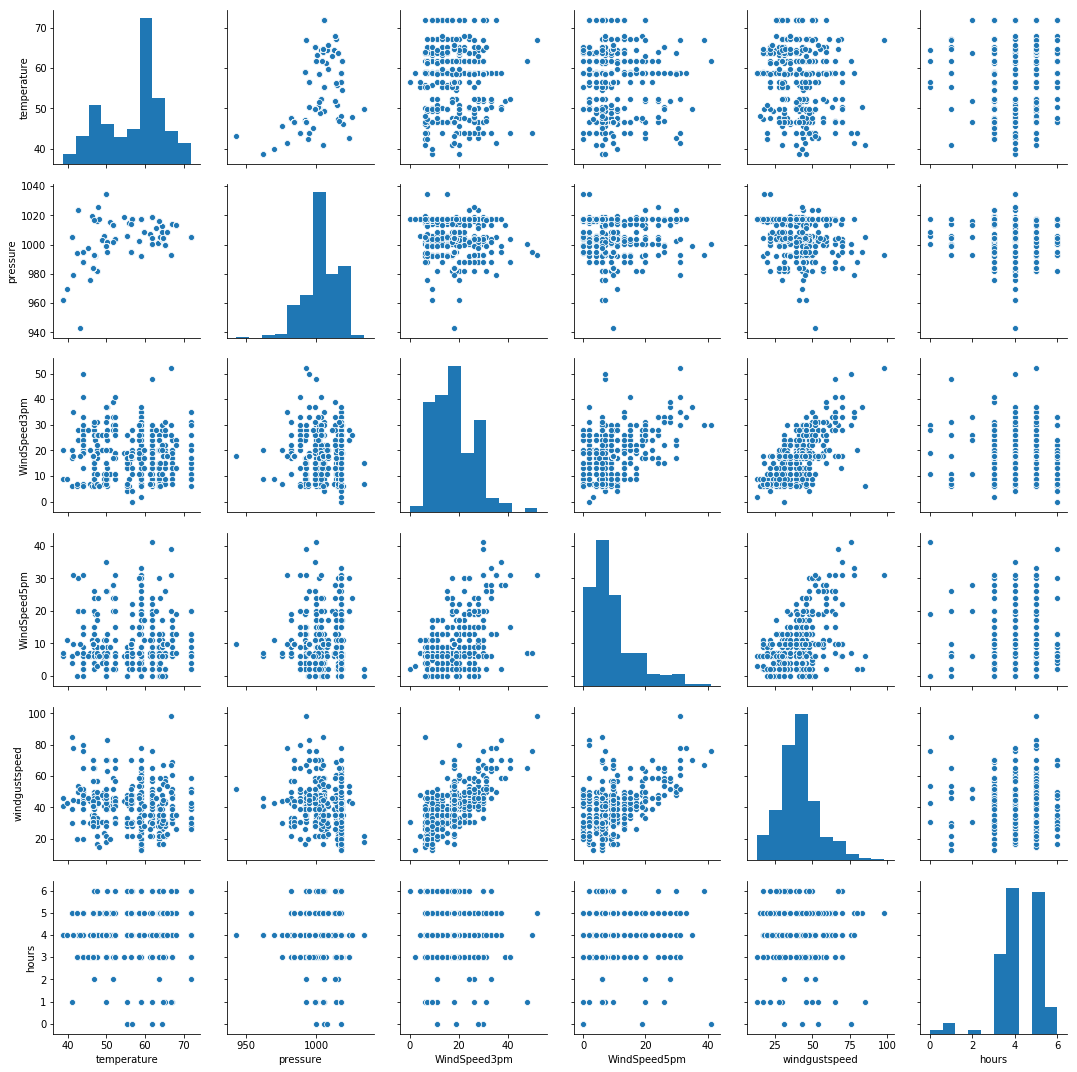

In [185]:
import seaborn as sns
sns.pairplot(dataset)

In [186]:
#plt.scatter(dataset['windgustspeed'],dataset['hours'])

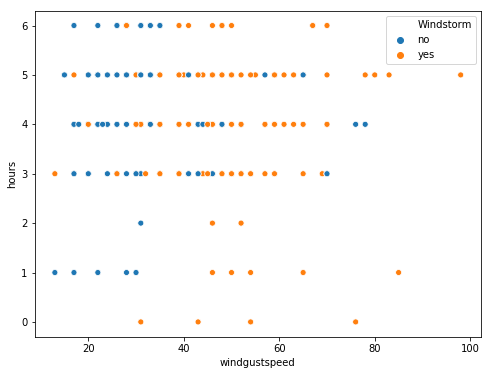

In [187]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'windgustspeed', y = 'hours', hue="Windstorm", data = dataset)

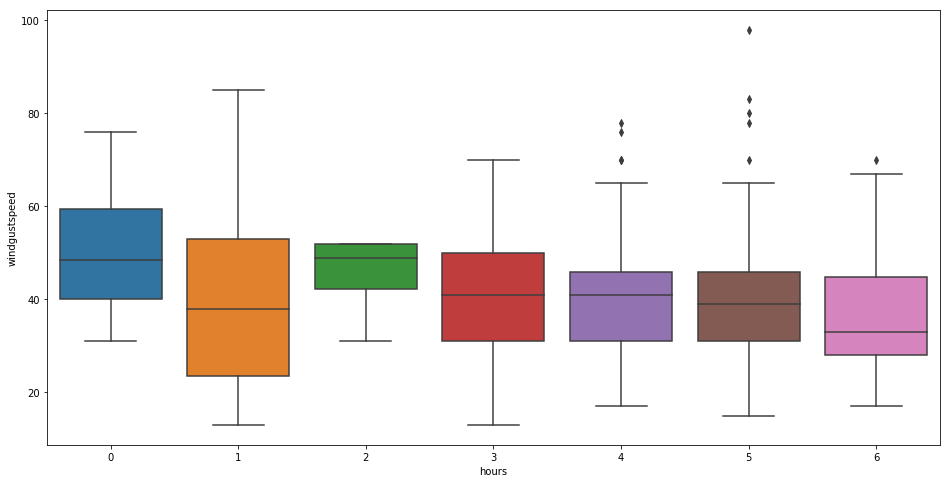

In [188]:
plt.figure(figsize = (16, 8))
sns.boxplot(x='hours', y='windgustspeed', data=dataset)

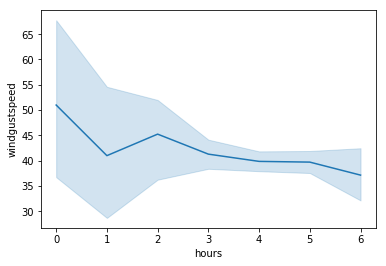

In [189]:
sns.lineplot(x="hours",y="windgustspeed", data=dataset)


In [190]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state = 0)

In [191]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [192]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
results = model.fit(x_train , y_train)


accuracy = model.score(x_train,y_train)
print('Accuracy of the model:',accuracy)


Accuracy of the model: 0.580715221377609


In [193]:
ypred = model.predict(x_test)

In [194]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.20320325310605175

In [195]:
#from sklearn.ensemble import LinearRegressor
#reg = LinearRegressor(criterion='mse')
#reg.fit(x,y)
#modelPred = reg.predict(x)
#print(modelPred)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression(criterion='mse')
regressor.fit(X_train, y_train)
modelPred = reg.predict(x)
print(modelPred)



print("Number of predictions:",len(modelPred))

meanSquaredError=mean_squared_error(y, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

TypeError: __init__() got an unexpected keyword argument 'criterion'

In [ ]:
def linear_regression(x, y, m_current=0, b_current=0, epochs=100, learning_rate=0.0001):
     N = float(len(y))
     for i in range(epochs):
          y_current = (m_current * x) + b_current
          cost = sum([data**2 for data in (y-y_current)]) / N
          m_gradient = -(2/N) * sum(x * (y - y_current))
          b_gradient = -(2/N) * sum(y - y_current)
          m_current = m_current - (learning_rate * m_gradient)
          b_current = b_current - (learning_rate * b_gradient)
     return(m_current, b_current, cost)
     print(m_current, b_current, cost)
linear_regression(x, y, m_current=0, b_current=0, epochs=100, learning_rate=0.0001)

In [ ]:
#linear_regression
cost
m_current
b_current

In [203]:
import numpy as np

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10
    n = len(x)
    learning_rate = 0.08

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

x = dataset[['temperature','pressure']].values
y = dataset[['hours','windgustspeed']].values
gradient_descent(x,y)

m [  38.0003609  6440.04030476], b [0.66325815 6.41764411], cost [  18.38596491 1782.85213033] iteration 0
m [-2.02141461e+04 -1.03932984e+09], b [-3.46650033e+02 -1.03478149e+06], cost [4.80236066e+06 4.18333295e+13] iteration 1
m [1.07730331e+07 1.67733922e+14], b [1.84757815e+05 1.66999880e+11], cost [1.36400756e+12 1.08957577e+24] iteration 2
m [-5.74141658e+09 -2.70700093e+19], b [-9.84654350e+07 -2.69515447e+16], cost [3.87417218e+17 2.83786966e+34] iteration 3
m [3.05984995e+12 4.36873707e+24], b [5.24765015e+10 4.34961847e+21], cost [1.10037587e+23 7.39141269e+44] iteration 4
m [-1.63072676e+15 -7.05055673e+29], b [-2.79670039e+13 -7.01970187e+26], cost [3.12538265e+28 1.92514062e+55] iteration 5
m [8.69085029e+17 1.13786546e+35], b [1.49048295e+16 1.13288590e+32], cost [8.87698195e+33 5.01415165e+65] iteration 6
m [-4.63173110e+20 -1.83636251e+40], b [-7.94343019e+18 -1.82832616e+37], cost [2.52131714e+39 1.30596781e+76] iteration 7
m [2.46845042e+23 2.96364323e+45], b [4.2333

In [ ]:
x = dataset[['temperature','pressure','WindSpeed3pm','WindSpeed5pm']].values
y = dataset[['hours','windgustspeed']]